<a href="https://colab.research.google.com/github/Aleena24/AML_lab/blob/main/B_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('/content/Program_3b_dataset.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
x = df[['variance','skewness','curtosis','entropy']]
y = df['class']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state = 42)

model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [24]:
acc = accuracy_score(y_pred, y_test)
print('Accuracy',acc)

pre = precision_score(y_pred, y_test)
print('Precision',pre)

rec = recall_score(y_pred, y_test)
print('Recall',rec)

rep = classification_report(y_pred, y_test)
print('Classification Report',rep)

Accuracy 0.9878640776699029
Precision 0.9890710382513661
Recall 0.9836956521739131
Classification Report               precision    recall  f1-score   support

           0       0.99      0.99      0.99       228
           1       0.99      0.98      0.99       184

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



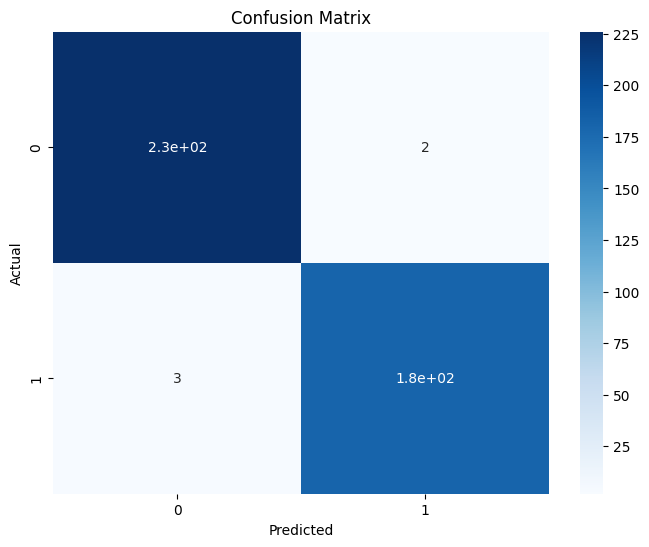

In [25]:
df = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8,6))
sns.heatmap(df, annot=True, cmap='Blues',cbar='False')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()